In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df_train = pd.read_csv('train.csv')

(array([1.000e+01, 3.000e+00, 1.654e+03, 2.548e+03, 1.390e+03, 5.380e+02,
        1.480e+02, 2.100e+01, 1.300e+01, 2.000e+00]),
 array([-6062.47     , -3192.3904059,  -322.3108118,  2547.7687823,
         5417.8483764,  8287.9279705, 11158.0075646, 14028.0871587,
        16898.1667528, 19768.2463469, 22638.325941 ]),
 <a list of 10 Patch objects>)

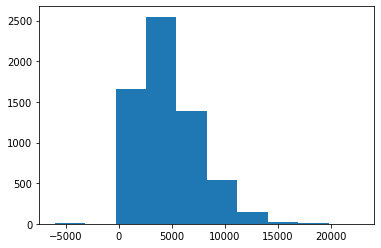

In [31]:
plt.hist(df_train['Selling_Price'])

In [32]:
df_train= df_train[df_train['Selling_Price']>0]

In [33]:
df_train.isnull().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       206
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       37
charges_1           197
charges_2 (%)       204
Minimum_price        38
Maximum_price       340
Selling_Price         0
dtype: int64

In [34]:
df_train.Minimum_price.median()

3165.0

In [35]:
df_train['Minimum_price'].fillna(3165.0,inplace=True)

In [36]:
df_train.isnull().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       206
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       37
charges_1           197
charges_2 (%)       204
Minimum_price         0
Maximum_price       340
Selling_Price         0
dtype: int64

In [37]:
df_train.Maximum_price.median()

5639.0

In [38]:
df_train['Maximum_price'].fillna(5639.0,inplace=True)

In [41]:
df_train.isnull().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       206
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       37
charges_1           197
charges_2 (%)       204
Minimum_price         0
Maximum_price         0
Selling_Price         0
dtype: int64

In [42]:
df_train['Discount_avail'].fillna(0.0,inplace=True)

In [44]:
df_train.isnull().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       206
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail        0
charges_1           197
charges_2 (%)       204
Minimum_price         0
Maximum_price         0
Selling_Price         0
dtype: int64

In [49]:
df_train.charges_1.median()

253.0

In [50]:
df_train['charges_1'].fillna(253.0,inplace=True)

In [53]:
df_train['charges_2 (%)'].median()

10.0

In [54]:
df_train['charges_2 (%)'].fillna(10.0,inplace=True)

In [57]:
df_train.isnull().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       206
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail        0
charges_1             0
charges_2 (%)         0
Minimum_price         0
Maximum_price         0
Selling_Price         0
dtype: int64

In [59]:
df_train.drop(['Product_id','Stall_no','instock_date','Customer_name'],inplace=True,axis=1)

In [61]:
df_train=pd.get_dummies(df_train,drop_first=True)

In [67]:
Y = df_train['Selling_Price']

In [71]:
X = df_train.drop('Selling_Price',axis=1)

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [76]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,Y)

LinearRegression()

In [77]:
y_pred = lr.predict(X)

In [78]:
lr.score(X,Y)

0.907916684692516

In [79]:
df_test = pd.read_csv('test.csv')

In [81]:
df_test.isnull().sum()

Product_id           0
Stall_no             1
instock_date         0
Market_Category      0
Customer_name       53
Loyalty_customer     0
Product_Category     0
Grade                0
Demand               0
Discount_avail       0
charges_1           36
charges_2 (%)        5
Minimum_price       14
Maximum_price        0
dtype: int64

In [82]:
df_test.Minimum_price.median()

3060.5

In [84]:
df_test['Minimum_price'].fillna(3060.5,inplace=True)

In [86]:
df_test.isnull().sum()

Product_id           0
Stall_no             1
instock_date         0
Market_Category      0
Customer_name       53
Loyalty_customer     0
Product_Category     0
Grade                0
Demand               0
Discount_avail       0
charges_1           36
charges_2 (%)        5
Minimum_price        0
Maximum_price        0
dtype: int64

In [87]:
df_test.charges_1.median()

252.0

In [88]:
df_test['charges_1'].fillna(252.0,inplace=True)

In [89]:
df_test.isnull().sum()

Product_id           0
Stall_no             1
instock_date         0
Market_Category      0
Customer_name       53
Loyalty_customer     0
Product_Category     0
Grade                0
Demand               0
Discount_avail       0
charges_1            0
charges_2 (%)        5
Minimum_price        0
Maximum_price        0
dtype: int64

In [90]:
df_test['charges_2 (%)'].median()

11.0

In [91]:
df_test['charges_2 (%)'].fillna(11.0,inplace=True)

In [93]:
df_test.isnull().sum()

Product_id           0
Stall_no             1
instock_date         0
Market_Category      0
Customer_name       53
Loyalty_customer     0
Product_Category     0
Grade                0
Demand               0
Discount_avail       0
charges_1            0
charges_2 (%)        0
Minimum_price        0
Maximum_price        0
dtype: int64

In [95]:
df_test_new = df_test.drop(['Product_id','Stall_no','instock_date','Customer_name'],axis=1)

In [98]:
df_test_new=pd.get_dummies(df_test_new,drop_first=True)

In [100]:
df_test_new = sc.fit_transform(df_test_new)

In [103]:
Y_test_Predict = lr.predict(df_test_new)

In [107]:
Y_test_Predict = abs(Y_test_Predict)

In [112]:
x1 = pd.Series(df_test['Product_id'])
x2 = pd.Series(Y_test_Predict)

In [115]:
data = pd.concat([x1,x2],axis=1)

In [116]:
data

,Product_id,0
0,SCHE4YSTDVPVZVXW,3713.999598
1,ACCEGCATKHNRXUHW,2426.049659
2,NKCE6GJ5XVJDXNNZ,11301.272154
3,NKCEB8BK3ZXDHDHM,9192.722187
4,TOPEFDXSAHRNPF94,5786.507778
...,...,...
3425,BBAE9K7BXFUTDNBK,4205.795266
3426,RTRDYPA4PJHCJCGF,8803.417914
3427,TUNE8FWQBS7TVVT7,5614.856708
3428,NKCEGMUABCRGUZPE,3804.697683


In [117]:
data.columns = ['Product_id','Selling_Price']

In [119]:
data.to_csv('Submission.csv',index=False)